# The geometry of efficient codes: how rate-distortion trade-offs distort the latent representations of generative models

This notebook contains the code to reproduce Figures 4, 5, 7, 8, 9, 10, 11 in the paper:
- arxiv: https://arxiv.org/abs/2406.07269 

## Notation

In the code you will find labels that do no correspond to the names of the models in the paper. However, the following mapping holds:
- `task2`: `E2M1`,
- `task3`: `E2M2`,
- `task1`: `E2M3`,
- `task0`: `E2M4`,
- `taskAll`: `E2M5`,
- `bottomBias`: `E1M1`,
- `alignBias`: `E1M2`

In [1]:
import os, sys
sys.path.append("..")

# Load results

## Settings

The following configuration dictionary specifies the settings for each model.

In [2]:
models = {
    'base':{
        'high': {
            'config': '../logs/BetaVAE_Unbiased_2Corridors/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_Unbiased_2Corridors/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_Unbiased_2Corridors/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_Unbiased_2Corridors/max_c_0.3/checkpoints/last.ckpt'
        },
    },
    'task0':{
        
        'high': {
            'config': '../logs/BetaVAE_CLF_task0/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task0/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task0/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task0/max_c_0.3/checkpoints/last.ckpt'
        },
    },

    'task1': {
        'high': {
            'config': '../logs/BetaVAE_CLF_task1/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task1/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task1/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task1/max_c_0.3/checkpoints/last.ckpt'
        },
    },

    'task2':{
        'high': {
            'config': '../logs/BetaVAE_CLF_task2/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task2/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task2/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task2/max_c_0.3/checkpoints/last.ckpt'
        },
    },

    'task3':{
    
        'high': {
            'config': '../logs/BetaVAE_CLF_task3/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task3/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task3/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task3/max_c_0.3/checkpoints/last.ckpt'
        },  
    },
    'taskAll': {
        'high': {
            'config': '../logs/BetaVAE_MultiCLF/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_MultiCLF/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_MultiCLF/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_MultiCLF/max_c_0.3/checkpoints/last.ckpt'
        }
    },
    'bottomBias':{
        'high': {
            'config': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_0.3/checkpoints/last.ckpt'
        },
    },
    'alignBias':{
        'high': {
            'config': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3/checkpoints/last.ckpt'
        }
    }
}

## Data

Load the dataset and select specfic data points to be shown in the figures.

In [3]:
import pandas as pd

def get_idx2label(row):
    return f'{row[169]},{row[170]}' 

data = pd.read_csv('../data/mazes_200k_2corridors_13x13.csv', header=None)
data = data.iloc[180_000:]
data['diff'] = data.iloc[:,169] - data.iloc[:,170]
#data = data.sort_values(by=['diff'])
n_imgs = 1500
idxs = data.sample(n_imgs).index
selected_idxs = [
    185_044, #0,12
    199_915, #2,10
    194_158, #4,8
    189_971, #6,6
    190_889, #8,4
    187_869, #10,2
    193_280, #12,0
    191126, #0,0
    185419, #2,2
    198997, #10,10
    197722, #12,12
    195734, #2,4
    194955, #4,2
    198524, #8,10
    185387, #10,8
    198185, #6,12
    192299, #6,0
    191412, #12,6
    188274, #0,6
    #185250, #6,4
    #196000, #6,8
    190549, #1,5
    190769, #5,1
    186536, #7,11
    188431, #11,7
]
idxs = idxs.union(selected_idxs)
data = data.loc[idxs].sort_values(by=['diff'])
idxs = data.index
idx2label = data.apply(get_idx2label, axis=1).to_dict()

reidxs = {idx: i for i, idx in enumerate(idxs)}
reidx2label = {reidxs[idx]: idx2label[idx] for idx in idxs}
selected_reidxs = [reidxs[selected_idx] for selected_idx in selected_idxs]


# idx to be annotated in the scatter plot
idx_toLabel = []#list(range(0, n_imgs, 50))
idx_toLabel.extend(selected_reidxs)

---

## Process results (skip if already done)

The following cell creates the file `notebooks/processed/2D_latent_results.pkl`. Skip this section if the file is already available.

In [4]:
import pickle
from src.utils.out_processing import Results

r = Results(
    path2data='../data/mazes_200k_2corridors_13x13.csv',
    models=models,
    idxs=idxs
)
r.load(**{'n_components': 2, 'n_jobs':20, 'random_state':42})
r.reidx2label = reidx2label
r.idx2label = idx_toLabel

with open('processed/2D_latent_results.pkl', 'wb') as f:
    pickle.dump(r, f)

/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/hom

## Load results 

In [2]:
import pickle
r = pickle.load(open('processed/2D_latent_results.pkl', 'rb'))

# Figures

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_embeddings(emb, y, idx_toLabel, reidx2label, title, palette='Pastel2', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    else:
        fig = None
    #ax.set_title(title)
    sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=y, palette=palette, ax=ax, s=120)
    #ax.set_xticks([])
    #ax.set_yticks([])
    eps = 0.01
    for i in idx_toLabel:
        txt = reidx2label[i]
        ax.annotate(txt, (emb[i,0]+eps, emb[i,1]), size=16)
        ax.scatter(x=emb[i,0], y=emb[i,1], facecolor='none', edgecolor='black', s=120)
    return fig, ax


In [4]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
from itertools import product

def get_class_dist_matrix(Z_dist, Z_base, labels, **kwargs):
    dist1 = pairwise_distances(Z_dist, metric='euclidean', **kwargs)
    dist2 = pairwise_distances(Z_base, metric='euclidean', **kwargs)
    ro = np.divide(dist1, dist2)
    ro[np.isnan(ro)] = 1

    ro = (ro-ro.mean())/ro.std()

    A = np.empty((2,2))

    #0-1
    sel0 = list(np.where(labels == 0)[0])
    sel1 = list(np.where(labels == 1)[0])
    sel = [*product(sel0, sel1)]
    l = []
    for i, j in sel:
        l.append(ro[i,j])
    A[0,1] = A[1,0] = np.array(l).mean()
    
    #0-0
    sel = list(np.where(labels == 0)[0])
    sel = [*product(sel, sel)]
    l = []
    for i, j in sel:
        l.append(ro[i,j])
    A[0,0] = np.array(l).mean()

    #1-1
    sel = list(np.where(labels == 1)[0])
    sel = [*product(sel, sel)]
    l = []
    for i, j in sel:
        l.append(ro[i,j])
    A[1,1] = np.array(l).mean()
    
    return A


def get_class_dist_matrix(Z_dist, Z_base, labels, **kwargs):
    dist1 = pairwise_distances(Z_dist, metric='euclidean', **kwargs)
    dist2 = pairwise_distances(Z_base, metric='euclidean', **kwargs)
    ro = np.divide(dist1, dist2)
    ro[np.isnan(ro)] = 1

    ro = (ro-ro.mean())#/ro.std()

    n = len(np.unique(labels))
    A = np.empty((n,n))

    for i in range(n):
        for j in range(n):
            if i==j:
                sel = list(np.where(labels == i)[0])
                sel = [*product(sel, sel)]
            if i!=j:
                sel0 = list(np.where(labels == i)[0])
                sel1 = list(np.where(labels == j)[0])
                sel = [*product(sel0, sel1)]
            l = []
            for u,v in sel:
                l.append(ro[u,v])
            A[i,j] = np.array(l).mean()    
    return A

In [5]:
from sklearn.preprocessing import MinMaxScaler

def get_tuning_curves(Z, y):
    """
    Returns the tuning curves, scaled between 0 and 1
    """
    z_min = Z.min()
    z_max = Z.max()
    Z = (Z - z_min) / (z_max - z_min)

    df = pd.DataFrame(Z)
    df[['xu', 'xl']] = y
    tc = df.groupby(['xu','xl']).mean().values
    return tc

In [6]:
import string 

def add_plot_ref(ax, i):
    ax.text(
        -0.04, 
        1.04, 
        string.ascii_uppercase[i], 
        transform=ax.transAxes, 
        size=25, 
        weight='bold'
)
    

### Senza matrici di distorsione 169x169

/tmp/ipykernel_2551469/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)
/tmp/ipykernel_2551469/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)
/tmp/ipykernel_2551469/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)
/tmp/ipykernel_2551469/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)


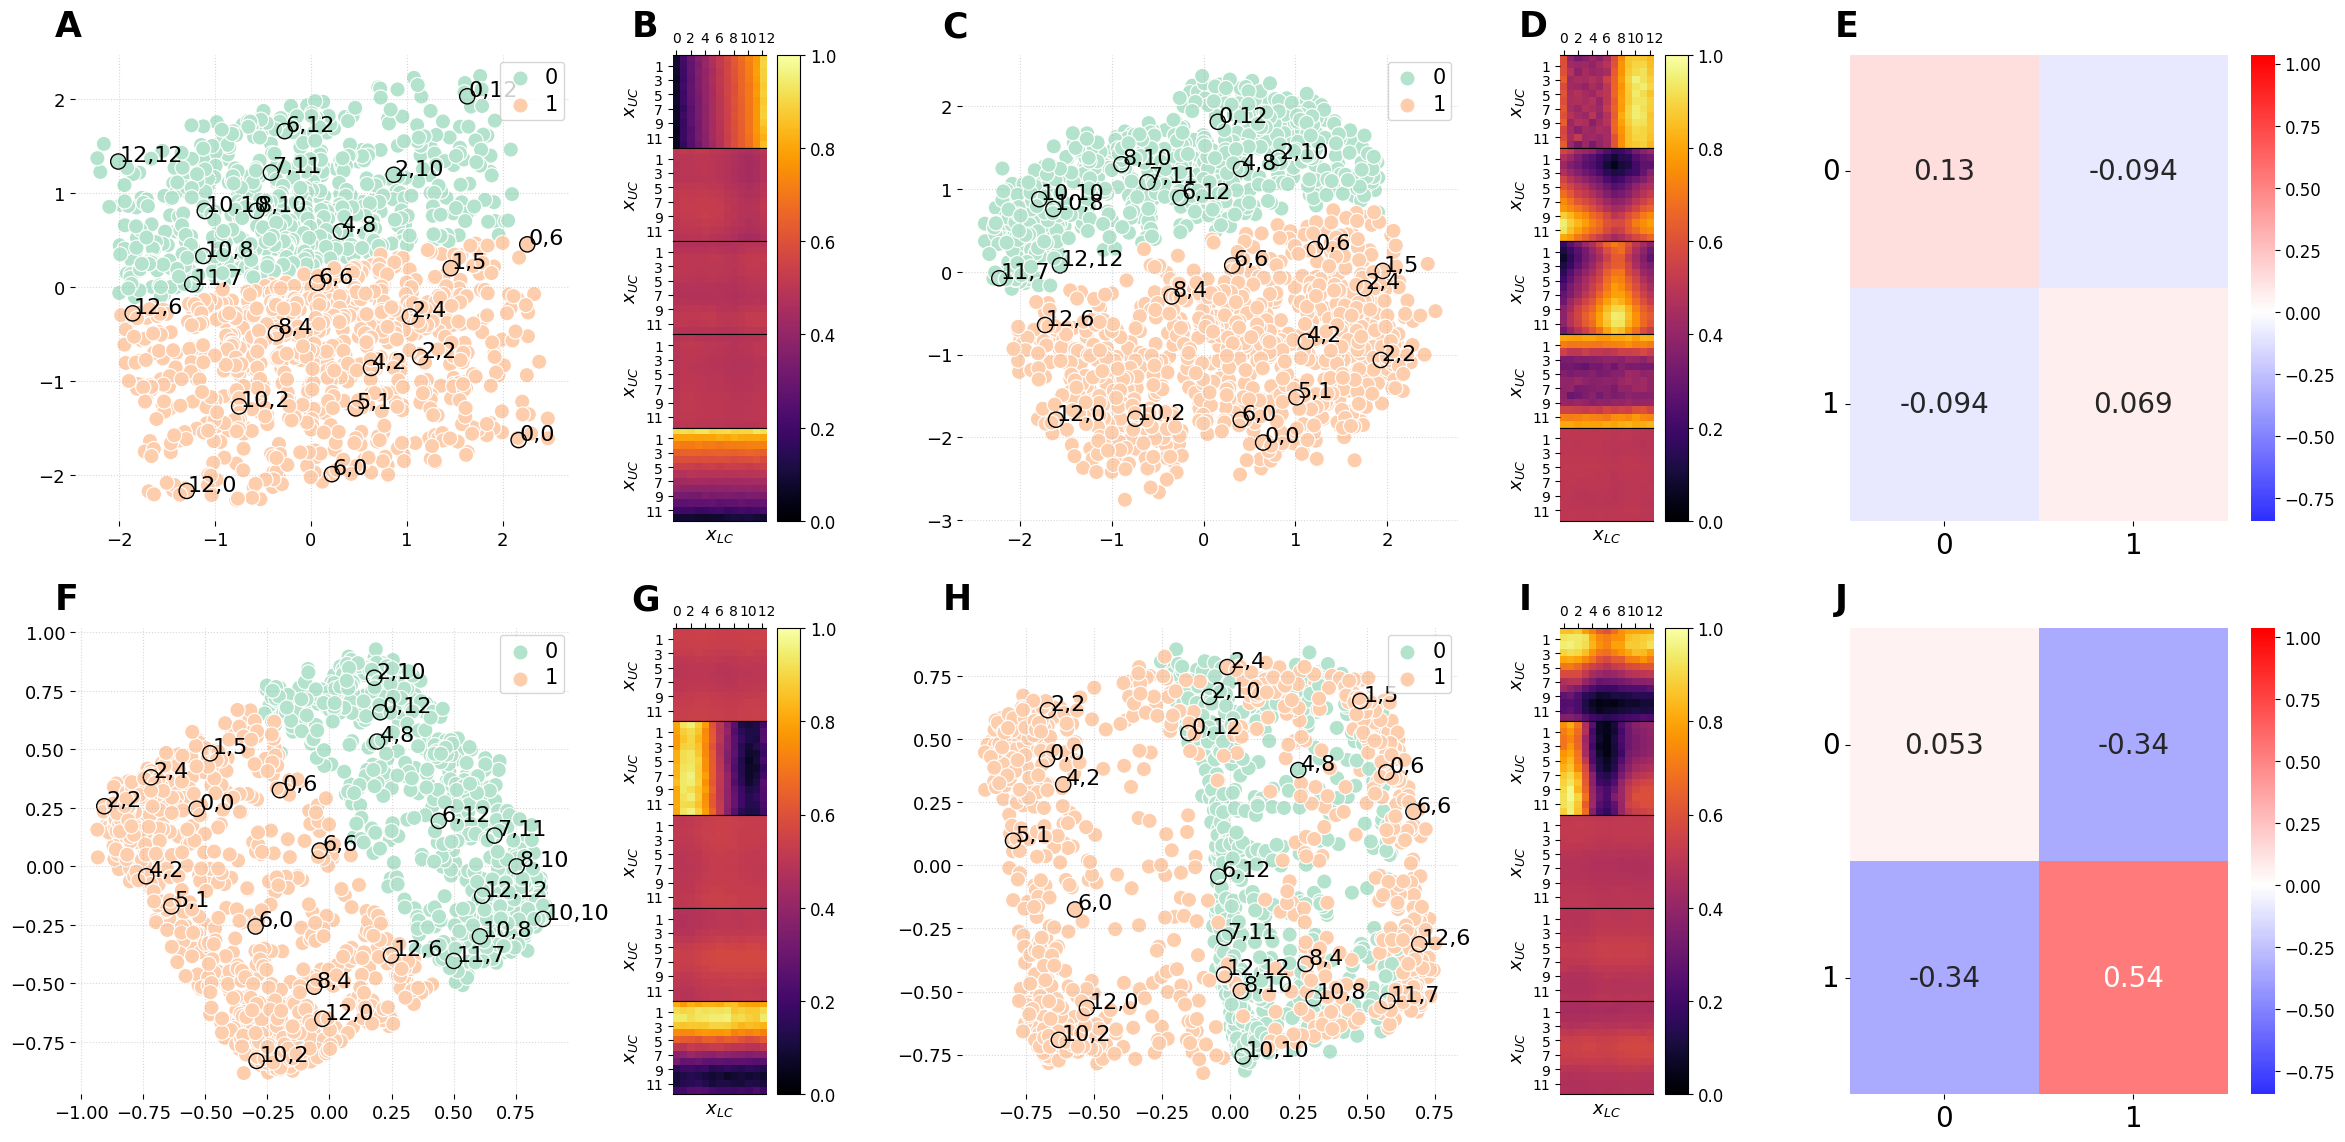

In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
from matplotlib import cm

LABEL_SIZE = 15

my_task = 'bottomBias' #@NOTE: CHANGE THIS TO PLOT THE RESULT OF A DIFFERENT MODEL

#fig, axs = plt.subplots(2, 3, figsize=(25, 15))

if (my_task == 'task0') or (my_task == 'taskAll'):
    fig = plt.figure(figsize=(30, 13.5))
    gs_out = gridspec.GridSpec(2, 4, figure=fig, width_ratios=[2, 2, 1.5, .1], hspace=.23, wspace=0.25)
else:
    fig = plt.figure(figsize=(29, 13.5))
    gs_out = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[2, 2, 1.3], hspace=.23, wspace=0.25)
 
 
ref = -1

# Precompute class distortion matrix CDM
CDM_dict = {}
cbar0_range = (0, 0)
for i, capacity in enumerate(r.capacities):
    mc_base = r.base.__getattribute__(capacity) #model container
    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity) #model container
    Z_base = mc_base.Z
    Z_dist = mc_dist.Z
    labels = mc_dist.y
    A = get_class_dist_matrix(Z_dist, Z_base, labels, n_jobs=20)
    cbar0_range = (
        min(cbar0_range[0], A.min()), 
        max(cbar0_range[1], A.max())
        )
    CDM_dict[i] = A
    CDM_dict['vmin'] = cbar0_range[0]
    CDM_dict['vmax'] = cbar0_range[1]

CAPDM_dict = {}
labels = r.base.high.y # NOTE: MAP THIS LABEL TO NUMBERS FROM 0 TO 169
new_lab = []
for i in range(labels.shape[0]):
    x,y = labels[i]
    new_lab.append(x*13 + y)
new_lab = np.array(new_lab).reshape(-1,1)
for i, mod in enumerate(['base', my_task]):
    mc = r.__getattribute__(mod).__getattribute__('high') #model container
    Z_high = mc.Z
    mc = r.__getattribute__(mod).__getattribute__('low') #model container
    Z_low = mc.Z
    A = get_class_dist_matrix(Z_low, Z_high, new_lab, n_jobs=20)
    cbar1_range = (0, 0)
    cbar1_range = (
        min(cbar1_range[0], A.min()), 
        max(cbar1_range[1], A.max())
        )
    CAPDM_dict[i] = A
    CAPDM_dict[f'{i}_vmin'] = cbar1_range[0]
    CAPDM_dict[f'{i}_vmax'] = cbar1_range[1]

# Create figure by row (i)
for i, capacity in enumerate(r.capacities):
        
    mc_base = r.base.__getattribute__(capacity) #model container
    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity) #model container

    y = mc_base.y
    labels = mc_dist.y

    # Each row has three columns. We loop (j) over the first two columns
    for j, mc in enumerate([mc_base, mc_dist]):

        # Divide each column in two subcolumns (one for embeddings and one for tuning curves)
        gs_in = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_out[i,j], hspace=0.01, width_ratios=[3,1]) 
        
        # Plot embeddings
        ax = fig.add_subplot(gs_in[0])
        plot_embeddings(mc.emb, labels, r.idx2label, r.reidx2label, '', ax=ax)
        ax.spines[:].set_visible(False)
        ax.grid(linestyle=':', alpha=.5)

        if (my_task == 'task0') or (my_task == 'taskAll'):
            task0_handles, task0_labels = ax.get_legend_handles_labels()
            # ax.legend([])
            ax.legend().remove()
        else:
            for text in ax.get_legend().get_texts():
                text.set_fontsize(LABEL_SIZE)
            
        for text in ax.get_xticklabels() + ax.get_yticklabels():# + ax.get_legend().get_texts():
            text.set_fontsize(LABEL_SIZE-2)

        ref += 1
        add_plot_ref(ax, ref)
        
        # Plot tuning curves
        ax = fig.add_subplot(gs_in[1])
        ax.set_axis_off()
        ref += 1
        add_plot_ref(ax, ref)

        cbar = fig.colorbar(
            ax=ax,
            use_gridspec=True,
            mappable=cm.ScalarMappable(
                cmap='inferno', 
                norm=cm.colors.Normalize(
                    vmin=0, 
                    vmax=1
                )
            ),
        )
        cbar.ax.tick_params(labelsize=LABEL_SIZE-3)
        
        tc = get_tuning_curves(mc.Z, y)
        gs_in_in = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=gs_in[1], hspace=0) 
        for z in range(tc.shape[1]):
            ax = fig.add_subplot(gs_in_in[z])
            
            divnorm=colors.TwoSlopeNorm(vmin=0, vcenter=.5, vmax=1)
            ax.matshow(
                tc[:,z].reshape(13,13),
                cmap='inferno',
                # vmin=mc.Z.min(),
                # vmax=mc.Z.max(),
                norm=divnorm
            )
        
            if z > 0:
                ax.set_xticks([])
            else:
                ax.set_xticks(list(range(0,13,2)))
                tmp_lab = [str(i) for i in range(0,13,2)]
                tmp_lab[-1] = '  12'
                ax.set_xticklabels(tmp_lab)
            
            ax.set_xlabel(r'$x_{LC}$', fontsize=LABEL_SIZE-2)
            ax.set_ylabel(r'$x_{UC}$', fontsize=LABEL_SIZE-2)
            ax.set_yticks(list(range(1,12,2)))
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)


    # Plot class distortion matrix (with colorbar on separate axis when task0) on the third column
    ax = fig.add_subplot(gs_out[i, 2])
    #ax.set_axis_off()
    ref += 1
    add_plot_ref(ax, ref)

    #gs_in = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_out[i, 2], hspace=0, wspace=0.1, width_ratios=[3, .2]) 
    #ax = fig.add_subplot(gs_in[0,0])
    #ref += 1 
    #add_plot_ref(ax, ref)
    
    if (my_task=='task0') or (my_task=='taskAll'):
        my_kwargs = {
            'annot':False,
            'annot_kws':{'fontsize': 5},
            'square': False
        }
    else:
        my_kwargs = {
            'annot':True,
            'annot_kws':{'fontsize': 20},
            # 'cmap': ListedColormap(['lightgray']),
            # 'linewidths': 1.5,
            # 'linecolor': 'black',
            'square': False,
        }

    sns.heatmap(
        CDM_dict[i],
        ax=ax, 
        #alpha=.8,
        cbar=1, 
        cmap='bwr', 
        vmin= CDM_dict['vmin'] - .5,
        center=0, 
        vmax= CDM_dict['vmax'] + .5,
        **my_kwargs
    )
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=LABEL_SIZE-3)

    if (my_task=='task0') or (my_task=='taskAll'):
        ticklabels_size = LABEL_SIZE-5
        ax.tick_params(axis='y', labelrotation=0)
    else:
        ticklabels_size = LABEL_SIZE+5
        ax.tick_params(axis='y', labelrotation=0)

    for text in ax.get_xticklabels() + ax.get_yticklabels():
        text.set_fontsize(ticklabels_size)        


if (my_task == 'task0') or (my_task == 'taskAll'):
        
    ax = fig.add_subplot(gs_out[:, 3])
    ax.set_axis_off()

    # Plot colorbars and legends on the last column
    #ref += 1
    #add_plot_ref(ax, ref)

    ax.legend(
        handles=task0_handles,
        labels=task0_labels,
        loc='center left',
        bbox_to_anchor=(-3, 0.5),
        title=None,
        fontsize=LABEL_SIZE,
        title_fontsize=LABEL_SIZE,
)


#fig.tight_layout()
fig.show()

In [48]:
task2name = {
    'task2': 'E2M1',
    'task3': 'E2M2',
    'task1': 'E2M3',
    'task0': 'E2M4',
    'taskAll': 'E2M5',
    'bottomBias': 'E1M1',
    'alignBias': 'E1M2'
}

fig.savefig(f'fig4paper/noCapDistMat/{task2name[my_task]}.pdf', bbox_inches='tight')
fig.savefig(f'fig4paper/noCapDistMat/{task2name[my_task]}.png', bbox_inches='tight')

---

### Con matrici di distorsione 169x169

/tmp/ipykernel_67401/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)
/tmp/ipykernel_67401/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)
/tmp/ipykernel_67401/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)
/tmp/ipykernel_67401/3820334789.py:47: RuntimeWarning: invalid value encountered in divide
  ro = np.divide(dist1, dist2)


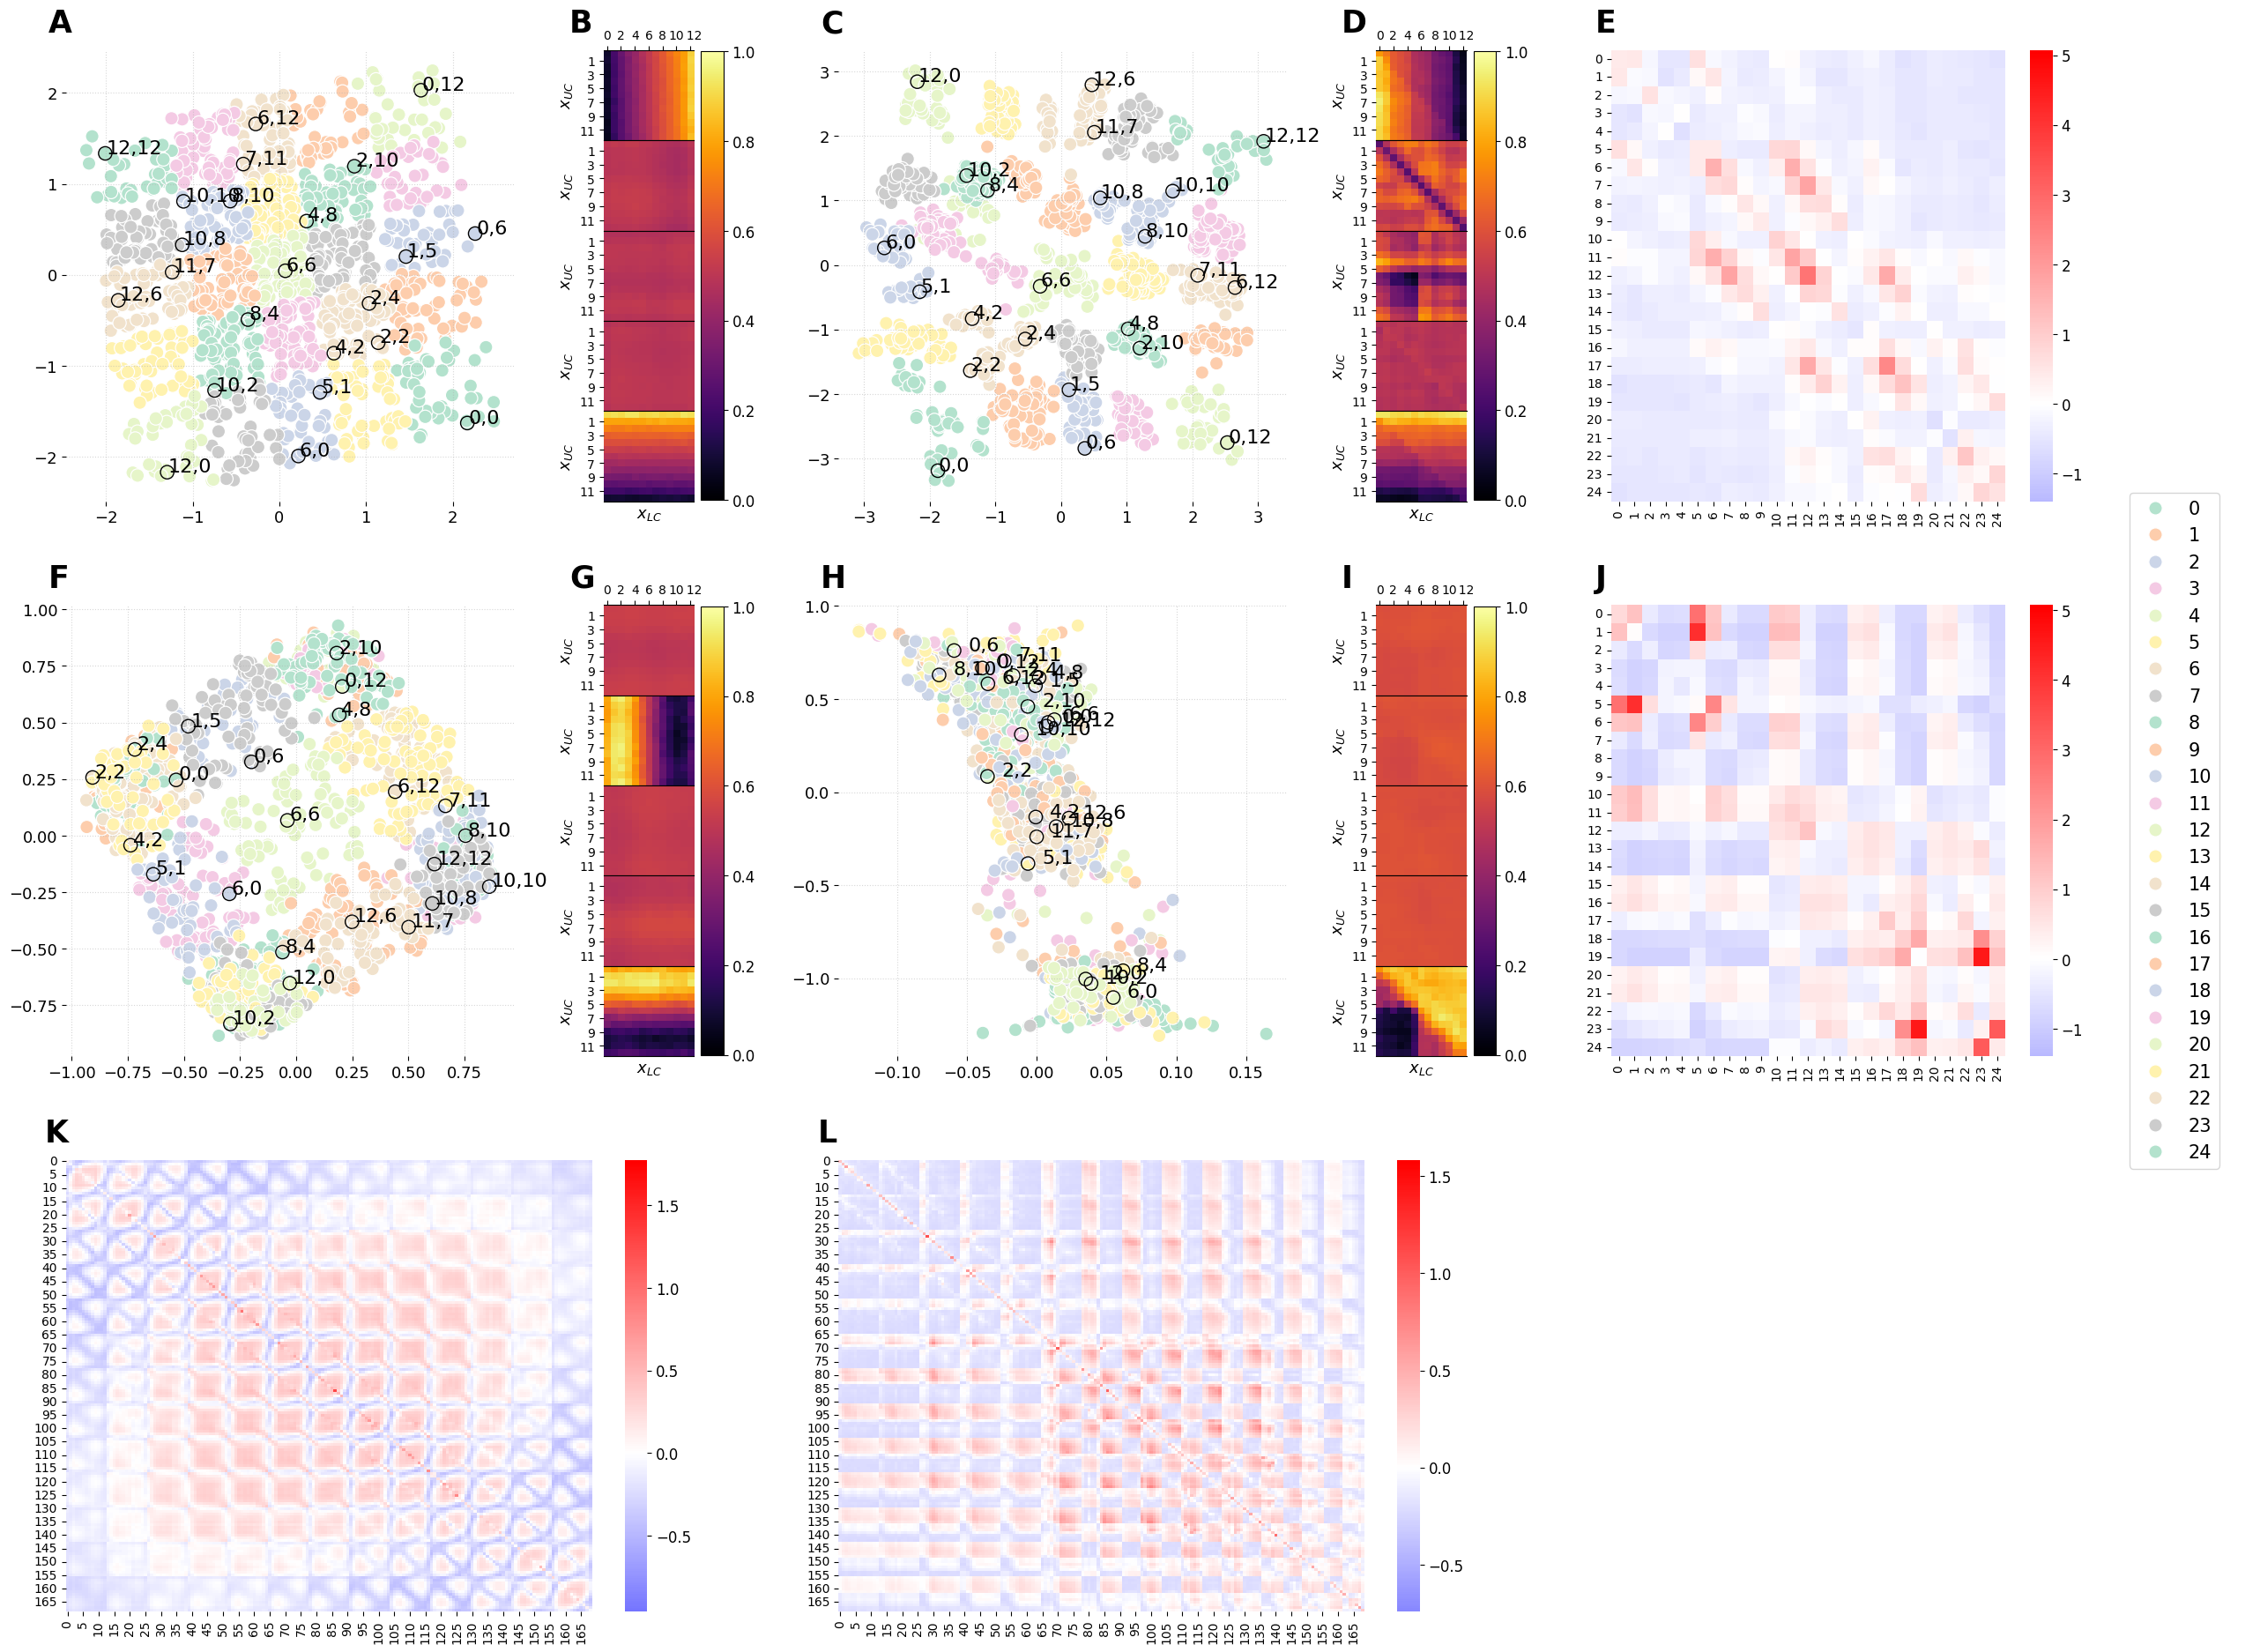

In [19]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
from matplotlib import cm

LABEL_SIZE = 15

my_task = 'taskAll'

#fig, axs = plt.subplots(2, 3, figsize=(25, 15))



if (my_task == 'task0') or (my_task == 'taskAll'):
    fig = plt.figure(figsize=(32, 23))
    gs_out = gridspec.GridSpec(3, 4, figure=fig, width_ratios=[2, 2, 1.5, .1], hspace=.23, wspace=0.25)
else:
    fig = plt.figure(figsize=(32, 23))
    gs_out = gridspec.GridSpec(3, 3, figure=fig, width_ratios=[2, 2, 1.3], hspace=.23, wspace=0.25)
 
ref = -1

# Precompute class distortion matrix CDM
CDM_dict = {}
cbar0_range = (0, 0)
for i, capacity in enumerate(r.capacities):
    mc_base = r.base.__getattribute__(capacity) #model container
    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity) #model container
    Z_base = mc_base.Z
    Z_dist = mc_dist.Z
    labels = mc_dist.y
    A = get_class_dist_matrix(Z_dist, Z_base, labels, n_jobs=20)
    cbar0_range = (
        min(cbar0_range[0], A.min()), 
        max(cbar0_range[1], A.max())
        )
    CDM_dict[i] = A
    CDM_dict['vmin'] = cbar0_range[0]
    CDM_dict['vmax'] = cbar0_range[1]

CAPDM_dict = {}
labels = r.base.high.y # NOTE: MAP THIS LABEL TO NUMBERS FROM 0 TO 169
new_lab = []
for i in range(labels.shape[0]):
    x,y = labels[i]
    new_lab.append(x*13 + y)
new_lab = np.array(new_lab).reshape(-1,1)
for i, mod in enumerate(['base', my_task]):
    mc = r.__getattribute__(mod).__getattribute__('high') #model container
    Z_high = mc.Z
    mc = r.__getattribute__(mod).__getattribute__('low') #model container
    Z_low = mc.Z
    A = get_class_dist_matrix(Z_low, Z_high, new_lab, n_jobs=20)
    cbar1_range = (0, 0)
    cbar1_range = (
        min(cbar1_range[0], A.min()), 
        max(cbar1_range[1], A.max())
        )
    CAPDM_dict[i] = A
    CAPDM_dict[f'{i}_vmin'] = cbar1_range[0]
    CAPDM_dict[f'{i}_vmax'] = cbar1_range[1]

# Create figure by row (i)
for i, capacity in enumerate(r.capacities):
        
    mc_base = r.base.__getattribute__(capacity) #model container
    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity) #model container

    y = mc_base.y
    labels = mc_dist.y

    # Each row has three columns. We loop (j) over the first two columns
    for j, mc in enumerate([mc_base, mc_dist]):

        # Divide each column in two subcolumns (one for embeddings and one for tuning curves)
        gs_in = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_out[i,j], hspace=0.01, width_ratios=[3,1]) 
        
        # Plot embeddings
        ax = fig.add_subplot(gs_in[0])
        plot_embeddings(mc.emb, labels, r.idx2label, r.reidx2label, '', ax=ax)
        ax.spines[:].set_visible(False)
        ax.grid(linestyle=':', alpha=.5)

        if (my_task == 'task0') or (my_task == 'taskAll'):
            task0_handles, task0_labels = ax.get_legend_handles_labels()
            ax.legend([])
            ax.legend().remove()
        else:
            for text in ax.get_legend().get_texts():
                text.set_fontsize(LABEL_SIZE)

        for text in ax.get_xticklabels() + ax.get_yticklabels():
            text.set_fontsize(LABEL_SIZE-2)

        ref += 1
        add_plot_ref(ax, ref)
        
        # Plot tuning curves
        ax = fig.add_subplot(gs_in[1])
        ax.set_axis_off()
        ref += 1
        add_plot_ref(ax, ref)

        cbar = fig.colorbar(
            ax=ax,
            use_gridspec=True,
            mappable=cm.ScalarMappable(
                cmap='inferno', 
                norm=cm.colors.Normalize(
                    vmin=0, 
                    vmax=1
                )
            ),
        )
        cbar.ax.tick_params(labelsize=LABEL_SIZE-3)
        
        tc = get_tuning_curves(mc.Z, y)
        gs_in_in = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=gs_in[1], hspace=0) 
        for z in range(tc.shape[1]):
            ax = fig.add_subplot(gs_in_in[z])
            
            divnorm=colors.TwoSlopeNorm(vmin=0, vcenter=.5, vmax=1)
            ax.matshow(
                tc[:,z].reshape(13,13),
                cmap='inferno',
                # vmin=mc.Z.min(),
                # vmax=mc.Z.max(),
                norm=divnorm
            )
        
            if z > 0:
                ax.set_xticks([])
            else:
                ax.set_xticks(list(range(0,13,2)))
                tmp_lab = [str(i) for i in range(0,13,2)]
                tmp_lab[-1] = '  12'
                ax.set_xticklabels(tmp_lab)
            
            ax.set_xlabel(r'$x_{LC}$', fontsize=LABEL_SIZE-2)
            ax.set_ylabel(r'$x_{UC}$', fontsize=LABEL_SIZE-2)
            ax.set_yticks(list(range(1,12,2)))
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)


    # Plot class distortion matrix (with colorbar on separate axis when task0) on the third column
    ax = fig.add_subplot(gs_out[i, 2])
    #ax.set_axis_off()
    ref += 1
    add_plot_ref(ax, ref)

    #gs_in = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_out[i, 2], hspace=0, wspace=0.1, width_ratios=[3, .2]) 
    #ax = fig.add_subplot(gs_in[0,0])
    #ref += 1 
    #add_plot_ref(ax, ref)
    
    if (my_task=='task0') or (my_task=='taskAll'):
        my_kwargs = {
            'annot':False,
            'annot_kws':{'fontsize': 5},
            'square': False,
        }
    else:
        my_kwargs = {
            'annot':True,
            'annot_kws':{'fontsize': 20},
            # 'cmap': ListedColormap(['lightgray']),
            # 'linewidths': 1.5,
            # 'linecolor': 'black',
            'square': False,
        }

    sns.heatmap(
        CDM_dict[i],
        ax=ax, 
        #alpha=.8,
        cbar=1, 
        cmap='bwr', 
        vmin= CDM_dict['vmin'] - .5,
        center=0, 
        vmax= CDM_dict['vmax'] + .5,
        **my_kwargs
    )
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=LABEL_SIZE-3)

    if (my_task=='task0') or (my_task=='taskAll'):
        ticklabels_size = LABEL_SIZE-5
        ax.tick_params(axis='y', labelrotation=0)
        ax.tick_params(axis='x', labelrotation=90)
    else:
        ticklabels_size = LABEL_SIZE+5
        ax.tick_params(axis='y', labelrotation=0)

    for text in ax.get_xticklabels() + ax.get_yticklabels():
        text.set_fontsize(ticklabels_size)        


if (my_task == 'task0') or (my_task == 'taskAll'):
        
    ax = fig.add_subplot(gs_out[:, 3])
    ax.set_axis_off()

    # Plot colorbars and legends on the last column
    #ref += 1
    #add_plot_ref(ax, ref)

    ax.legend(
        handles=task0_handles,
        labels=task0_labels,
        loc='center left',
        bbox_to_anchor=(-3, 0.5),
        title=None,
        fontsize=LABEL_SIZE,
        title_fontsize=LABEL_SIZE,
    )

for i, mod in enumerate(['base', my_task]):
        
    ax = fig.add_subplot(gs_out[2, i])
    #ax.set_axis_off()
    ref += 1
    add_plot_ref(ax, ref)

    sns.heatmap(
        CAPDM_dict[i],
        ax=ax, 
        #alpha=.8,
        cbar=1, 
        cmap='bwr', 
        vmin= CAPDM_dict[f'{i}_vmin'] - .5,
        center=0, 
        vmax= CAPDM_dict[f'{i}_vmax'] + .5,
        **{'annot':False,}
    )
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=LABEL_SIZE-3)

#fig.tight_layout()
fig.show()

In [21]:
task2name = {
    'task2': 'E2M1',
    'task3': 'E2M2',
    'task1': 'E2M3',
    'task0': 'E2M4',
    'taskAll': 'E2M5',
    'bottomBias': 'E1M1',
    'alignBias': 'E1M2'
}

fig.savefig(f'fig4paper/pdf/{task2name[my_task]}.pdf', bbox_inches='tight')
fig.savefig(f'fig4paper/png/{task2name[my_task]}.png', bbox_inches='tight')

---